In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

1.Data CLeaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#drop last 3 clns.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.sample(5)

,v1,v2
1385,ham,That's ok. I popped in to ask bout something a...
3762,ham,K.i will send in &lt;#&gt; min:)
2104,ham,Anyway seriously hit me up when you're back be...
1632,ham,Hello my little party animal! I just thought I...
2405,ham,I'm meeting Darren...


In [6]:
#renaming the colns.
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5002,spam,CDs 4u: Congratulations ur awarded å£500 of CD...
2696,ham,Nope but i'm going home now then go pump petro...
3845,ham,Pls go there today &lt;#&gt; . I dont want an...
116,spam,You are a winner U have been specially selecte...
57,ham,"Sorry, I'll call later in meeting."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target']=encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#missing values.
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicate values.
df.duplicated().sum()

403

In [12]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()


0

2.EDA

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

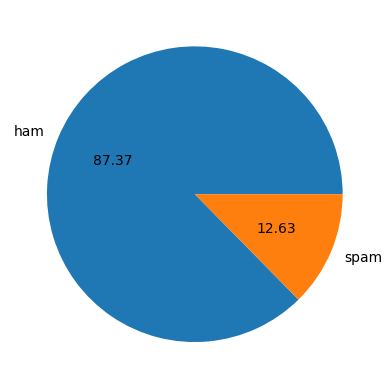

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
# separating the data as texts and label

X = df['text']

Y = df['target']

In [19]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object


In [20]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32


In [21]:
#Splitting the data into training data & test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [23]:
## Feature Extraction

# convert text into feature vector or numeric values
from sklearn.feature_extraction.text import TfidfVectorizer

# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [24]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [25]:
Y_train

4443    0
982     1
3822    0
3924    0
4927    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: target, Length: 4135, dtype: int32

In [26]:
Y_test

4994    0
4292    0
4128    0
4429    0
660     0
       ..
4003    0
1107    0
5413    0
1413    1
4998    0
Name: target, Length: 1034, dtype: int32

In [28]:
print(X_train)

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasn‰Û÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: text, Length: 4135, dtype: object


print(X_train_features)

# Training the Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
model = LogisticRegression()

# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [36]:
# prediction on training data

prediction = model.predict(X_train_features)
accuracy = accuracy_score(Y_train, prediction)

In [37]:
print('Accuracy on training data : ', accuracy*100)

Accuracy on training data :  96.32406287787182


In [38]:
# prediction on test data

prediction = model.predict(X_test_features)
accuracy  = accuracy_score(Y_test, prediction)

In [39]:
print('Accuracy on training data : ', accuracy*100)

Accuracy on training data :  96.42166344294004


# Building a model

In [41]:

input_mail = ['I HAVE A DATE ON SUNDAY WITH WILL!!']

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


                                            END..!!